### 命名实体识别

In [25]:
import spacy

nlp = spacy.load('/opt/homebrew/Caskroom/miniconda/base/envs/mactalk/lib/python3.10/site-packages/zh_core_web_sm/zh_core_web_sm-3.5.0')
text = "下周三晚上给第二个Keynote定稿"
doc = nlp(text)
print(doc)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)



ImportError: spacy-pkuseg not installed. To use this model, install spacy-pkuseg with `pip install "spacy-pkuseg>=0.0.27,<0.1.0"` or `conda install -c conda-forge "spacy-pkuseg>=0.0.27,<0.1.0"`

### 命名实体识别 - 模式匹配

In [ ]:
import re

pattern = r'^\d{12}[A-Z]{3}$' # 这个正则表达式匹配12个数字后跟3个大写字母

text = "你好，我有一个订单一直没有收到，订单号是202303251200ABC"
doc = nlp(text)
for word in doc:
    match = re.search(pattern, word.text)
    if match:
        print("订单号: ", match.group())

### 命名实体识别 - 直接通过ChatGPT的API来做

In [ ]:
import openai, os
openai.api_key = os.environ.get("OPENAI_API_KEY")

COMPLETION_MODEL = "text-davinci-003"
def get_response(prompt, temperature = 1.0, stop=None):
    completions = openai.Completion.create(
        engine=COMPLETION_MODEL,
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=stop,
        temperature=temperature,
    )
    message = completions['choices'][0]['text']
    return message

text = "你好，我有一个订单一直没有收到，订单号是202303251200ABC"

print(get_response("请从下面的文本中提取出用户的订单号，并以json形式显示：\n\n" + text))

### 分词找一些有用的关键词

In [ ]:
text = '''外形外观：紫色，非常大气，方方正正，四周圆角
屏幕音效：清晰度分辨率都挺满意，听音乐效果也不错
拍照效果：非常好
运行速度：很流畅
待机时间：之前的安卓手机用了近三年，一天3充，现在妥妥的一天一充'''

useful_words_list = ['大气', '满意', '好', '流畅']

doc = nlp(text)
for word in doc:
    if word.text in useful_words_list:
        print(word)

### 计算 N-Grams

In [ ]:
text = '''外形外观：紫色，非常大气，方方正正，四周圆角
屏幕音效：清晰度分辨率都挺满意，听音乐效果也不错
拍照效果：非常好
运行速度：很流畅
待机时间：之前的安卓手机用了近三年，一天3充，现在妥妥的一天一充'''

from nltk.util import ngrams

doc = nlp(text)

words = []
for word in doc:
    words.append(word.text)

list(ngrams(words, 2))


In [ ]:
list(ngrams(words, 3))

### TF-IDF 演示

In [ ]:
doc_a = 'this document is first document'
doc_b = 'this document is the second document'

bag_of_words_a = doc_a.split(' ')
bag_of_words_b = doc_b.split(' ')

unique_words_set = set(bag_of_words_a).union(set(bag_of_words_b))
print(unique_words_set)

# Now create a dictionary of words and their occurence for each document in the corpus (collection of documents).

dict_a = dict.fromkeys(unique_words_set, 0)
print(dict_a) # {'this': 0, 'document': 0, 'second': 0, 'is': 0, 'the': 0}

for word in bag_of_words_a:
    dict_a[word] += 1

print(dict_a)
# {'this': 1, 'document': 2, 'second': 1, 'is': 1, 'the': 1}

# similarly

dict_b = dict.fromkeys(unique_words_set, 0)

for word in bag_of_words_b:
    dict_b[word] += 1

print(dict_b)

In [34]:
# 计算单词在句子中出现的概率
# 计算词频（TF = term frequency）
def compute_term_frequency(word_dictionary, bag_of_words):
    term_frequency_dictionary = {}
    length_of_bag_of_words = len(bag_of_words) # 5

    for word, count in word_dictionary.items():
        term_frequency_dictionary[word] = count / float(length_of_bag_of_words)

    return term_frequency_dictionary

# Implementation
tf_a = compute_term_frequency(dict_a, bag_of_words_a)
print(tf_a)

tf_b = compute_term_frequency(dict_b, bag_of_words_b)
print(tf_b)

{'is': 0.2, 'document': 0.4, 'first': 0.2, 'second': 0.0, 'the': 0.0, 'this': 0.2}
{'is': 0.16666666666666666, 'document': 0.3333333333333333, 'first': 0.0, 'second': 0.16666666666666666, 'the': 0.16666666666666666, 'this': 0.16666666666666666}


In [40]:
import math
# 计算逆文档频率
def compute_inverse_document_frequency(full_doc_list):
    idf_dict = {}
    length_of_doc_list = len(full_doc_list) # 2

    # Initialize dictionary with words from all documents 用所有文档中的单词初始化字典
    idf_dict = dict.fromkeys(full_doc_list[0].keys(), 0)
    
    # Count the number of documents that contain each word 计算包含每个单词的文档数量
    for doc in full_doc_list:
        for word, val in doc.items():
            if val > 0:
                idf_dict[word] += 1

    # Compute IDF for each word 计算每个单词的IDF
    for word, val in idf_dict.items():
        idf_dict[word] = math.log((length_of_doc_list+1) / (float(val) + 1))

    return idf_dict

final_idf_dict = compute_inverse_document_frequency([dict_a, dict_b])

import json

# Print the final_idf_dict dictionary in a pretty format
print(json.dumps(final_idf_dict, indent=2))

{
  "is": 0.0,
  "document": 0.0,
  "first": 0.4054651081081644,
  "second": 0.4054651081081644,
  "the": 0.4054651081081644,
  "this": 0.0
}
{
  "is": 0.0,
  "document": 0.0,
  "first": 0.4054651081081644,
  "second": 0.4054651081081644,
  "the": 0.4054651081081644,
  "this": 0.0
}


In [38]:
# doc_a = 'this document is first document'
# doc_b = 'this document is the second document'


def calculate_tf_id(tf, idf):
    tf_idf = {}
    for word, val in tf.items():
        tf_idf[word] = val * idf[word]
    return tf_idf

print(calculate_tf_id(tf_a, final_idf_dict))
# print(calculate_tf_id(tf_b, final_idf_dict))


{'is': 0.0, 'document': 0.0, 'first': 0.08109302162163289, 'second': 0.0, 'the': 0.0, 'this': 0.0}


### 直接使用TF/IDF的库

In [41]:
import pandas as pd
import numpy as np

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df['embedding'] = df.embedding.apply(eval).apply(np.array)

In [42]:
df.head

<bound method NDFrame.head of      Unnamed: 0   ProductId          UserId  Score  \
0             0  B003XPF9BO  A3R7JR3FMEBXQB      5   
1           297  B003VXHGPK  A21VWSCGW7UUAR      4   
2           296  B008JKTTUA  A34XBAIFT02B60      1   
3           295  B000LKTTTW  A14MQ40CCU8B13      5   
4           294  B001D09KAM  A34XBAIFT02B60      1   
..          ...         ...             ...    ...   
995         623  B0000CFXYA  A3GS4GWPIBV0NT      1   
996         624  B0001BH5YM   A1BZ3HMAKK0NC      5   
997         625  B0009ET7TC  A2FSDQY5AI6TNX      5   
998         619  B007PA32L2  A15FF2P7RPKH6G      5   
999         999  B001EQ5GEO  A3VYU0VO6DYV6I      5   

                                               Summary  \
0    where does one  start...and stop... with a tre...   
1                     Good, but not Wolfgang Puck good   
2    Should advertise coconut as an ingredient more...   
3                                     Best tomato soup   
4    Should advertise coconut a

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['Summary']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus) # 对corpus中的文本转换成TF-IDF矩阵
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()) # 将稀疏矩阵 tfidf_matrix 转换成DataFrame 对象，get_feature_names_out 设置 DataFrame 列明，从文本数据中提取的特征词或术语
print(tfidf_df)

      12   13   21   31   32   34   40   50   51   60  ...  yogurt  yorkie  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...     ...   
995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   
999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0     0.0   

     you  your  yuk  yum  yummmm  yummmmm  yummy  zipfizz  
0  

In [48]:
# 获取给定行的TF-IDF值最高的词与分数，并返回一个包含💰
def get_top_n_words(row, tfidf_df, top_n=5):
    # Get the words and corresponding tf-idf scores for the given row 获取给定行的单词和相应的tf-idf分数
    words_and_scores = [(word, tfidf_df.loc[row, word]) for word in tfidf_df.columns]

    # Sort the words by their tf-idf scores
    words_and_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the top n words
    top_n_words_and_scores = words_and_scores[:top_n]
    
    return top_n_words_and_scores

# Print the highest tf-idf words and their scores for the first 5 rows 输出前5行中每行的最高TF-IDF词及其分数
for i in range(5):
    print(f"Row {i+1}: {get_top_n_words(i, tfidf_df)}")

Row 1: [('start', 0.394384915946285), ('stop', 0.394384915946285), ('where', 0.394384915946285), ('does', 0.35649943107170623), ('treat', 0.312176255125172)]
Row 2: [('good', 0.5681028016321258), ('puck', 0.49441945926150405), ('wolfgang', 0.49441945926150405), ('but', 0.3153408915839207), ('not', 0.2981914242226147)]
Row 3: [('advertise', 0.36559695823357646), ('ingredient', 0.36559695823357646), ('prominently', 0.36559695823357646), ('should', 0.36559695823357646), ('an', 0.3574098136743376)]
Row 4: [('tomato', 0.6610768832907321), ('soup', 0.6331508937690398), ('best', 0.4026130898245583), ('12', 0.0), ('13', 0.0)]
Row 5: [('advertise', 0.36559695823357646), ('ingredient', 0.36559695823357646), ('prominently', 0.36559695823357646), ('should', 0.36559695823357646), ('an', 0.3574098136743376)]


### Word2Vec的演示

In [7]:
# Word2Vec 的模型文件请自行下载
# https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

ModuleNotFoundError: No module named 'gensim'

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print(result)

In [ ]:
vector = model['king']
print(vector)

In [ ]:
# 词向量的加减法
# Rome - Italy + France = ?
result = model.most_similar(positive=['Rome', 'France'], negative=['Italy'])
print(result)

In [ ]:
result = model.most_similar("cat")
print(result)

### PCA降维，展示不同词之间的二维关系

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def visualize_words(words):
    # Get the vectors for the words
    vectors = [model[word] for word in words]

    # Create a PCA object and fit_transform the vectors
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    # Create a color map
    colors = ["b", "g", "r", "c"]

    # Plot each word in 2D space using PCA results
    for i, word in enumerate(words):
        plt.scatter(pca_result[i, 0], pca_result[i, 1], c=colors[i], label=word)
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

    plt.legend()
    plt.show()

In [9]:
# List of words to visualize
words = ["queen", "king", "girl", "boy"]
visualize_words(words)

NameError: name 'model' is not defined

In [ ]:
# List of words to visualize
words = ["Italy", "France", "Rome", "Paris"]
visualize_words(words)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def colorize_words(words, vectors):
    # 创建色带图的颜色映射
    cmap = plt.get_cmap('bwr')

    # 创建一个子图的网格，每行一个子图
    fig, axs = plt.subplots(len(words), 1, figsize=(12, 2*len(words)))

    for ax, word, vector in zip(axs, words, vectors):
        # 获取词向量并调整为二维
        matrix = np.array(vector).reshape(1, -1)

        # 在子图上显示色带图
        img = ax.imshow(matrix, cmap=cmap, aspect='auto')

        # 隐藏y轴
        ax.set_yticks([])

        # 为子图添加标题
        ax.set_title(f"Word Vector for '{word}'")
        ax.set_xlabel('Dimensions')

    plt.tight_layout()

    # 调整子图和colorbar的位置
    fig.subplots_adjust(right=0.85)  # leave some space for the colorbar
    cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])  # position of the colorbar
    fig.colorbar(img, cax=cbar_ax, label='Value')

    plt.show()


# 词列表
words = ["king", "queen", "boy", "girl", "man", "woman"]
vectors = [model[word] for word in words]
colorize_words(words, vectors)


In [ ]:


# 词列表
words = ["king", "queen"]
vectors = [model[word] for word in words]


words.append("king-boy+girl")
vector = model["king"] - model["boy"] + model["girl"]
vectors.append(vector)
colorize_words(words, vectors)

In [ ]:
similarity = model.cosine_similarities(model['queen'], [vector])
print(f"Cosine similarity between 'queen' and 'king - boy + girl': {similarity[0]}")


In [ ]:
similarity = model.cosine_similarities(model['queen'], [model['king']])
print(f"Cosine similarity between 'queen' and 'king': {similarity[0]}")

similarity = model.cosine_similarities(model['queen'], [model['girl']])
print(f"Cosine similarity between 'queen' and 'girl': {similarity[0]}")


similarity = model.cosine_similarities(model['queen'], [model['boy']])
print(f"Cosine similarity between 'queen' and 'boy': {similarity[0]}")


similarity = model.cosine_similarities(model['queen'], [model['paris']])
print(f"Cosine similarity between 'queen' and 'paris': {similarity[0]}")


### 直接通过 Word2Vec 做情感分析

In [10]:
import pandas as pd
import numpy as np

datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df['embedding'] = df.embedding.apply(eval).apply(np.array)

In [11]:
df.head()

,Unnamed: 0,ProductId,UserId,Score,Summary,Text,combined,n_tokens,embedding
0,0,B003XPF9BO,A3R7JR3FMEBXQB,5,where does one start...and stop... with a tre...,Wanted to save some to bring to my Chicago fam...,Title: where does one start...and stop... wit...,52,"[0.007018072064965963, -0.02731654793024063, 0..."
1,297,B003VXHGPK,A21VWSCGW7UUAR,4,"Good, but not Wolfgang Puck good","Honestly, I have to admit that I expected a li...","Title: Good, but not Wolfgang Puck good; Conte...",178,"[-0.003140551969408989, -0.009995664469897747,..."
2,296,B008JKTTUA,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."
3,295,B000LKTTTW,A14MQ40CCU8B13,5,Best tomato soup,I have a hard time finding packaged food of an...,Title: Best tomato soup; Content: I have a har...,111,"[-0.0013932279543951154, -0.011112828738987446..."
4,294,B001D09KAM,A34XBAIFT02B60,1,Should advertise coconut as an ingredient more...,"First, these should be called Mac - Coconut ba...",Title: Should advertise coconut as an ingredie...,78,"[-0.01757248118519783, -8.266511576948687e-05,..."


In [12]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

def get_word2vec(line):
    vec = np.zeros(300)
    count = 0
    for word in line.split():
        if word in model:
            vec += model[word]
            count += 1
    vec /= count
    return vec

df["word2vec"] = df.combined.apply(get_word2vec)
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

ModuleNotFoundError: No module named 'gensim'

In [ ]:
df.head()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    list(df.word2vec.values), df.sentiment, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


AttributeError: 'DataFrame' object has no attribute 'word2vec'

### 对比Fasttext效果

In [ ]:
# 模型文件下载地址 https://fasttext.cc/docs/en/crawl-vectors.html
# 或者 链接: https://pan.baidu.com/s/1Cl0eFNLOkQqquf9ls0trEw 提取码: jvr4

import gensim
import numpy as np
# Load the FastText pre-trained model
model = gensim.models.fasttext.load_facebook_model('data/cc.en.300.bin')

def get_fasttext(line):
    vec = np.zeros(300) # Initialize an empty 300-dimensional vector
    for word in line.split():
        vec += model.wv[word]
    vec /= len(line.split()) # Take the average over all words in the line
    return vec

df["fasttext"] = df.combined.apply(get_fasttext)


In [ ]:
df.head()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    list(df.fasttext.values), df.sentiment, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)


### 对比OpenAI的Embedding的效果

In [13]:

X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.sentiment, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

NameError: name 'train_test_split' is not defined

### 使用Gensim的Doc2Vec训练一个Doc Vector

In [ ]:
import gensim
from gensim.models.doc2vec import TaggedDocument

# Prepare the data for Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['combined'].apply(str.split))]

# Train a Doc2Vec model
model = gensim.models.Doc2Vec(documents, vector_size=300, min_count=2, epochs=40)

def get_doc2vec(line):
    # Tokenize the line, convert to lowercase, remove punctuation and stop words
    words = gensim.utils.simple_preprocess(line)
    # Infer the vector for the line
    vec = model.infer_vector(words)
    return vec

# Add the Doc2Vec vectors to the dataframe
df["doc2vec"] = df.combined.apply(get_doc2vec)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    list(df.doc2vec.values), df.sentiment, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

### Word2Vec的平均，也一样对数据进行预处理，看看会怎么样

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin.gz', binary=True)

def get_word2vec(line):
    vec = np.zeros(300)
    count = 0
    words = gensim.utils.simple_preprocess(line)

    for word in words:
        if word in model:
            vec += model[word]
            count += 1
    vec /= count
    return vec

df["word2vec"] = df.combined.apply(get_word2vec)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    list(df.word2vec.values), df.sentiment, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

### Position Encoding的可视化

In [15]:
# https://github.com/jalammar/jalammar.github.io/blob/master/notebookes/transformer/transformer_positional_encoding_graph.ipynb


import numpy as np
import matplotlib.pyplot as plt

In [16]:


# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding



(1, 10, 64)


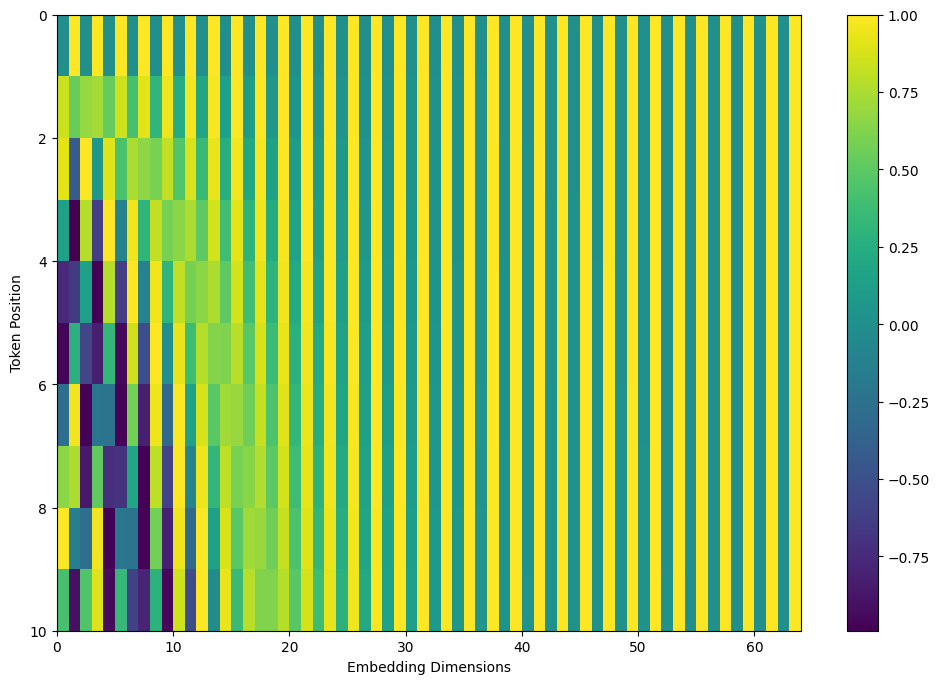

In [17]:
tokens = 10
dimensions = 64

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [18]:
print (pos_encoding)


[[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
    0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000